This program is used to find the most matched slope (w) and intercept (b).

The generated 3D graph demonstrates the error distribution.

In [17]:
def forward(x):
    return x * w + b

In [18]:
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

In [19]:
w_list = []
mse_list = []
b_list = []
x_data = [1.0, 2.0, 3.0, 4.0]
y_data = [3.0, 5.0, 7.0, 9.0]
for w in np.arange(0.0, 4.1, 0.1):
    mse_list_row = []
    for b in np.arange(0.0, 4.1, 0.1):
        print('w=', w, ' b=', b)
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            y_pred_val = forward(x_val)
            loss_val = loss(x_val, y_val)
            l_sum += loss_val
            print('\t', x_val, y_val, y_pred_val, loss_val)
        print('MSE=', l_sum / 3)
        if(len(b_list) != 41):
            b_list.append(b)
        mse_list_row.append(l_sum / 3)
    w_list.append(w)
    mse_list.append(mse_list_row)

w= 0.0  b= 0.0
	 1.0 3.0 0.0 9.0
	 2.0 5.0 0.0 25.0
	 3.0 7.0 0.0 49.0
	 4.0 9.0 0.0 81.0
MSE= 54.666666666666664
w= 0.0  b= 0.1
	 1.0 3.0 0.1 8.41
	 2.0 5.0 0.1 24.010000000000005
	 3.0 7.0 0.1 47.61000000000001
	 4.0 9.0 0.1 79.21000000000001
MSE= 53.080000000000005
w= 0.0  b= 0.2
	 1.0 3.0 0.2 7.839999999999999
	 2.0 5.0 0.2 23.04
	 3.0 7.0 0.2 46.239999999999995
	 4.0 9.0 0.2 77.44000000000001
MSE= 51.52
w= 0.0  b= 0.30000000000000004
	 1.0 3.0 0.30000000000000004 7.290000000000001
	 2.0 5.0 0.30000000000000004 22.090000000000003
	 3.0 7.0 0.30000000000000004 44.89
	 4.0 9.0 0.30000000000000004 75.68999999999998
MSE= 49.98666666666666
w= 0.0  b= 0.4
	 1.0 3.0 0.4 6.760000000000001
	 2.0 5.0 0.4 21.159999999999997
	 3.0 7.0 0.4 43.559999999999995
	 4.0 9.0 0.4 73.96
MSE= 48.48
w= 0.0  b= 0.5
	 1.0 3.0 0.5 6.25
	 2.0 5.0 0.5 20.25
	 3.0 7.0 0.5 42.25
	 4.0 9.0 0.5 72.25
MSE= 47.0
w= 0.0  b= 0.6000000000000001
	 1.0 3.0 0.6000000000000001 5.76
	 2.0 5.0 0.6000000000000001 19.360000000

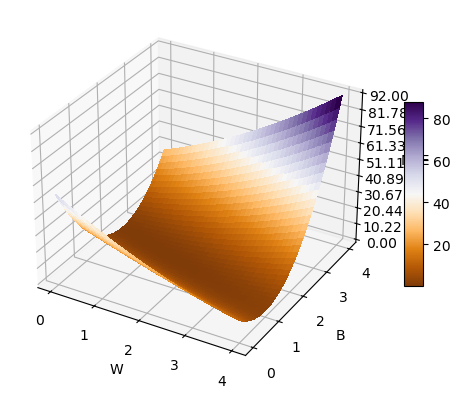

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
w_array = np.array(w_list)
b_array = np.array(b_list)
MSE = np.array(mse_list)
W, B = np.meshgrid(w_array, b_array)

# Plot the surface.
surf = ax.plot_surface(W, B, MSE, cmap=cm.PuOr,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(MSE), np.max(MSE))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('MSE')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()
